ValueError: zero-size array to reduction operation maximum which has no identity

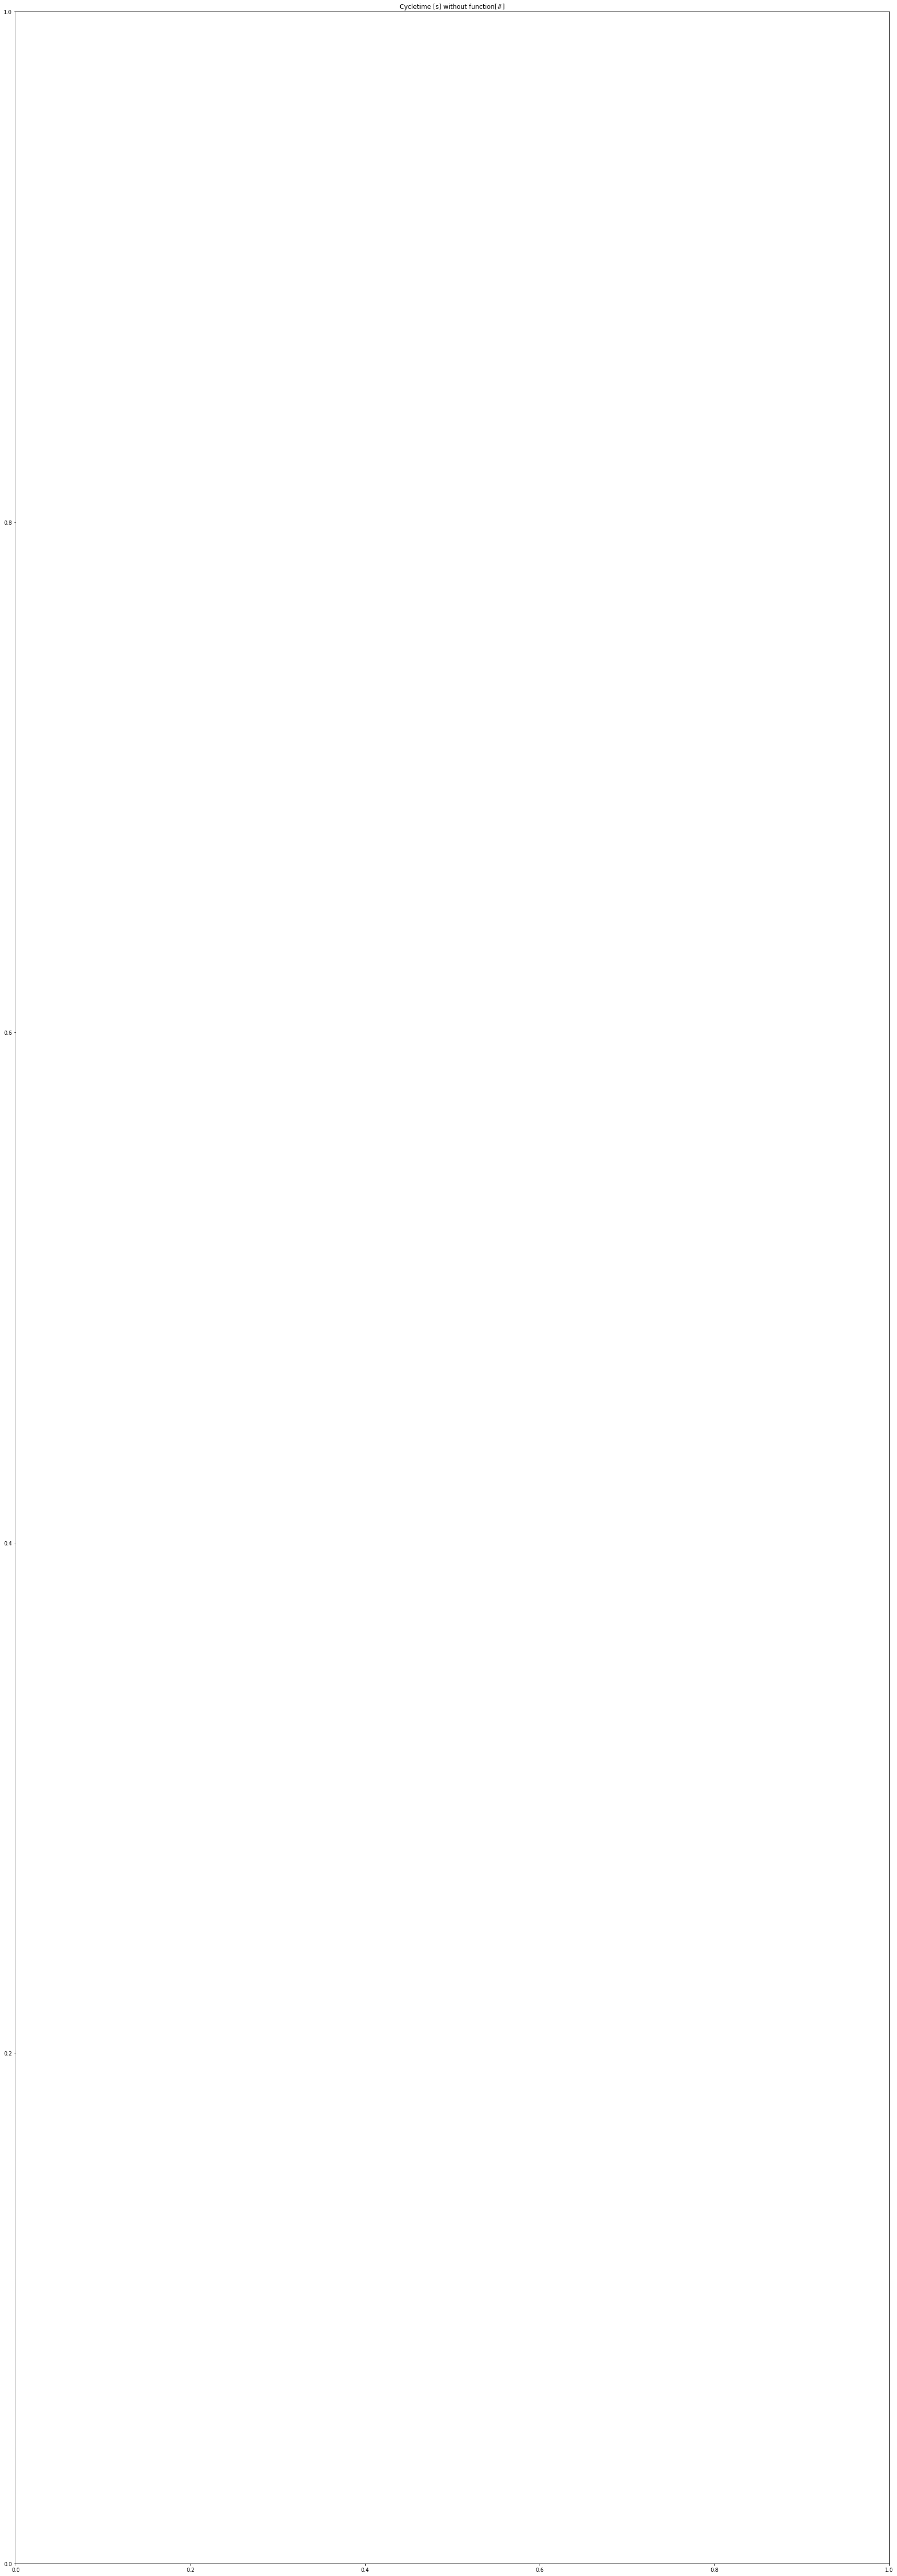

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.ticker import (MultipleLocator)
import csv
import pathlib

file = "secondary_calls.csv"
responseSize = 3
data = []
func = False
with open(file) as plotValues:
    spamreader = csv.reader(plotValues, delimiter='\t', quotechar='|')
    stat = {}
    for row in spamreader:
        try:
            if row[1] == '':
                function = row[0][8:]
                stat = {}
                stat['label'] = row[0]
                func = True

            if row[0] == '':
                func = False
            if func == True:
                if row[0] == 'outlierMax':
                    pass
                 #   stat['outlierMax'] = row[1]

                if row[0] == 'max':
                    stat['whishi'] = float(row[1])

                if row[0] == 'q75':
                    stat['q3'] = float(row[1])

                if row[0] == 'median':
                    stat['med'] = float(row[1])

                if row[0] == 'q25':
                    stat['q1'] = float(row[1])

                if row[0] == 'min':
                    stat['whislo'] = float(row[1])

                if row[0] == 'outlierMin':
                    pass
                #    stat['outlierMin'] = row[1]

                if row[0] == 'skewness':
                    #    stat['skewness'] = row[1]
                    data.append(stat)
                else:
                    pass
        except IndexError:
            None

#
outlierMax = 15.625
max = 10.99152
q75 = 10.331111
median = 10.1226935
q25 = 9.968218
min = 9.54068
outlierMin = 0.0
skewness = 0.148644366245696

stats = [{
    "label": '1',  # not required
    "med": median,
    "q1": q25,
    "q3": q75,
    # "cilo": 5.3 # not required
    # "cihi": 5.7 # not required
    "whislo": min,  # required
    "whishi": max,  # required
    "fliers": [outlierMax, outlierMin]  # required if showfliers=True
}]

fig1, ax1 = plt.subplots(sharey=True, sharex=True, figsize=(30, 90))
ax1.set_title('Cycletime [s] without function[#]')
# ax1.boxplot(data)
ax1.bxp(data, showfliers=False, vert=False, meanline=True)
ax1.xaxis.set_major_locator(MultipleLocator(1))
plt.tight_layout()
plt.grid(True, which='both', axis='x', linewidth=2, linestyle='--')
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.ticker import (MultipleLocator)
import csv
import pathlib

file = "secondary_calls.csv"
data = []
func = False
with open(file) as plotValues:
    func_list = []
    spamreader = csv.reader(plotValues, delimiter='\t', quotechar='|')
    stat = {}

    for row in spamreader:
        try:
            if row[0][:8] == 'function':
                label = row[0][9:]
                label = label[:-1]
                func = True
            if row[0] == '':
                func = False
            if func == True:
                if row[1] != '':
                    func_list.append(float(row[1]))
                if row[0] == "time[255]":
                    stat[label] = func_list
                    func_list = []
        except IndexError:
            None
    data.append(stat)
# Plot tables
fig1, ax1 = plt.subplots(sharey=True, sharex=True, figsize=(40, 20))
ax1.axis('tight')
plt.subplot(2, 1, 1)
labels, data = [*zip(*data[0].items())]
bp = plt.boxplot(data, meanline=True, showmeans=True, bootstrap=5000)

line_y = []
for line in bp['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1]  # top of median line
    # overlay median value
    plt.text(x-0.5, y, '%.1f' % y, verticalalignment='center')
    line_y.append(y)

res = {key: [v.get_data() for v in value] for key, value in bp.items()}
plt.xticks(range(1, len(labels) + 1), labels)
plt.grid(True, which='both', axis='y', linewidth=2, linestyle='--')
plt.legend(res)

plt.subplot(2, 1, 2)
ax1.set_xlim(0)
markerline, stemlines, baseline = plt.stem(
    line_y, bottom=line_y[63], linefmt='grey')
baseline_1 = line_y[63]
print(f'Baseline 1 = {baseline_1}')
difference = []
for val in line_y:
    diff = val - line_y[63]
    diff = '%.2f' % diff
    difference.append(float(diff))
plt.xticks(range(0, len(labels)), difference)
plt.grid(True, which='both', axis='x', linewidth=0.5, linestyle='--')
plt.grid(True, which='both', axis='y', linewidth=2, linestyle='--')

plt.tight_layout(pad=1, w_pad=1.0, h_pad=1)
plt.margins(x=0.008, y=0.1)
print(f'{sum(difference[46:59])}')
plt.show()


file = "third_calls.csv"
data = []
func = False
func_description = ['profinet diag + 001_alarm',    #0
                    '002_alarm_ctrl',               #1
                    'SaveX',                        #2
                    "003_HMI_recipe_data",
                    "004_HMI",                      #4
                    "Time_Sync",
                    "000_Siemens_HMI_EX",
                    "076 Topmodule up cycle",
                    "075 Topmodule down cycle",
                    "070 Startposition cycle",      #9
                    "041 Seal & cutting cycle",
                    "040 Film change cycle",
                    "035 Suctionbox adj. cyc.",
                    "024 Stretchunit length<>",
                    "022 Stretchunit width <>",     #14
                    "025_Reinforcement",
                    "020 Stretch cycle",
                    "017 Buffer cycle",
                    "012 Multiple hood cycle",
                    "011 Hood help cycle",          #19
                    "010 Hood cycle", 
                    "088_Step_SV",
                    "094 Timer supervision",
                    "092 Timer", 
                    "091 Position",                 #24
                    "093 Timer adjust",
                    "009 Heightmeasuring cyc.",
                    "080 Help functions",
                    "100 Output frame",
                    "120 Output stretch units",    #29
                    "130 Output openingsystem",
                    "140 Output filmfeed dev.",
                    "996 Interface HF05_06",
                    "100 Output frame",
                    "Asi-5 master to HMI",           #34
                    "copy output to ASi-5",
                    'TESTING',
                    "091_Encoder_Asi5",
                    "1000_Conv",
                    'Empty',                        #39
                    "SaveX_Process_evaluation", 
                    "SaveX_Product_info",
                    "SaveX_Alarm_evaluation",
                    "190_Calc_reinforcement",
                    "187_Buffer_film_amount",       #44
                    "1010_Conv_Hx",                 
                    "1011_Conv_HMI",
                    "1055-90011 A--> B(A-->pos,pos->B)_Asi5",
                    "1055-90004 A --> B(Length)_Asi5",
                    "1055-90002 A --> B_Asi5",
                    "1008_Conv_man_ctrl_2",                 #50
                    "1055-90002 A --> B_Asi5",              #51
                    "1008_Conv_man_ctrl_2",                 #52
                    "1055-90001 A(int) --> B_Asi5",         #53
                    "1008_Conv_man_ctrl_2",                 #54
                    "1051-00001 A --> B(pos,int)_Asi5",     #55
                    "1008_Conv_man_ctrl_2",                 #56
                    "1051-00016 adjust device_Asi5",        #57
                    "1055-90503_Centering_Electric_Asi5",   #58
                    "1055-90501 Centering_Asi5",            #59
                    '1008_conv_man_ctrl_2 string_conv',     #60
                    'conv_man_ctrl_2 SKIP',                 #61
                    'Conveyors all FALSE',        #62
                    'BASELINE']                             #63
if len(func_description) != 64:
    raise "wrong func_description lenght"
with open(file) as plotValues:
    func_list = []
    spamreader = csv.reader(plotValues, delimiter='\t', quotechar='|')
    stat = {}

    for row in spamreader:
        try:
            if row[0][:8] == 'function':
                label = row[0][9:]
                label = label[:-1]
                func = True
            if row[0] == '':
                func = False
            if func == True:
                if row[1] != '':
                    func_list.append(float(row[1]))
                if row[0] == "time[255]":
                    stat[label] = func_list
                    func_list = []
        except IndexError:
            None
    data.append(stat)
# Plot tables
fig1, ax1 = plt.subplots(sharey=True, sharex=True, figsize=(40, 20))
ax1.axis('tight')
plt.subplot(3, 1, 1)
labels, data = [*zip(*data[0].items())]
bp = plt.boxplot(data, meanline=True, showmeans=True, bootstrap=5000)

line_y = []
for line in bp['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1]  # top of median line
    # overlay median value
    plt.text(x-0.5, y, '%.1f' % y, verticalalignment='center')
    line_y.append(y)


res = {key: [v.get_data() for v in value] for key, value in bp.items()}
plt.xticks(range(1, len(labels) + 1), labels)
plt.grid(True, which='both', axis='y', linewidth=2, linestyle='--')
plt.legend(res)

plt.subplot(3, 1, 2)
ax1.set_xlim(0)
markerline, stemlines, baseline = plt.stem(
    line_y, bottom=line_y[63], linefmt='grey')
baseline_2 = line_y[63]
print(f'Baseline 2 = {baseline_2}')
difference_b = []
for val in line_y:
    diff = val - line_y[63]
    diff = '%.2f' % diff
    difference_b.append(float(diff))
plt.xticks(range(0, len(labels)), difference_b)
plt.grid(True, which='both', axis='x', linewidth=0.5, linestyle='--')
plt.grid(True, which='both', axis='y', linewidth=2, linestyle='--')
plt.margins(x=0.008, y=0.1)


plt.subplot(3, 1, 3)
difference_sum = []
for val in range(len(difference)):
    float_val = ((difference_b[val] + baseline_2) - ((difference[val] + baseline_1)))
    float_val = '%.2f' % float_val
    difference_sum.append(float(float_val))

labels_with_comment = []
for i in range(len(difference_sum)):
    labels_with_comment.append(
        func_description[i] + ' = ' + str(difference_sum[i]))
labels_with_comment = tuple(labels_with_comment)

plt.stem(difference_sum, bottom=difference_sum[63], linefmt='grey')
plt.xticks(range(0, len(labels)), labels_with_comment, rotation=45)
fig1.autofmt_xdate()
plt.grid(True, which='both', axis='x', linewidth=0.5, linestyle='--')
plt.grid(True, which='both', axis='y', linewidth=2, linestyle='--')

plt.margins(x=0.008, y=0.1)
plt.tight_layout(pad=1, w_pad=1.0, h_pad=2)
plt.show()
for row in range(len(difference)):
    print(f'func {func_description[row]} diff: {difference_sum[row]}')


FileNotFoundError: [Errno 2] No such file or directory: 'secondary_calls.csv'

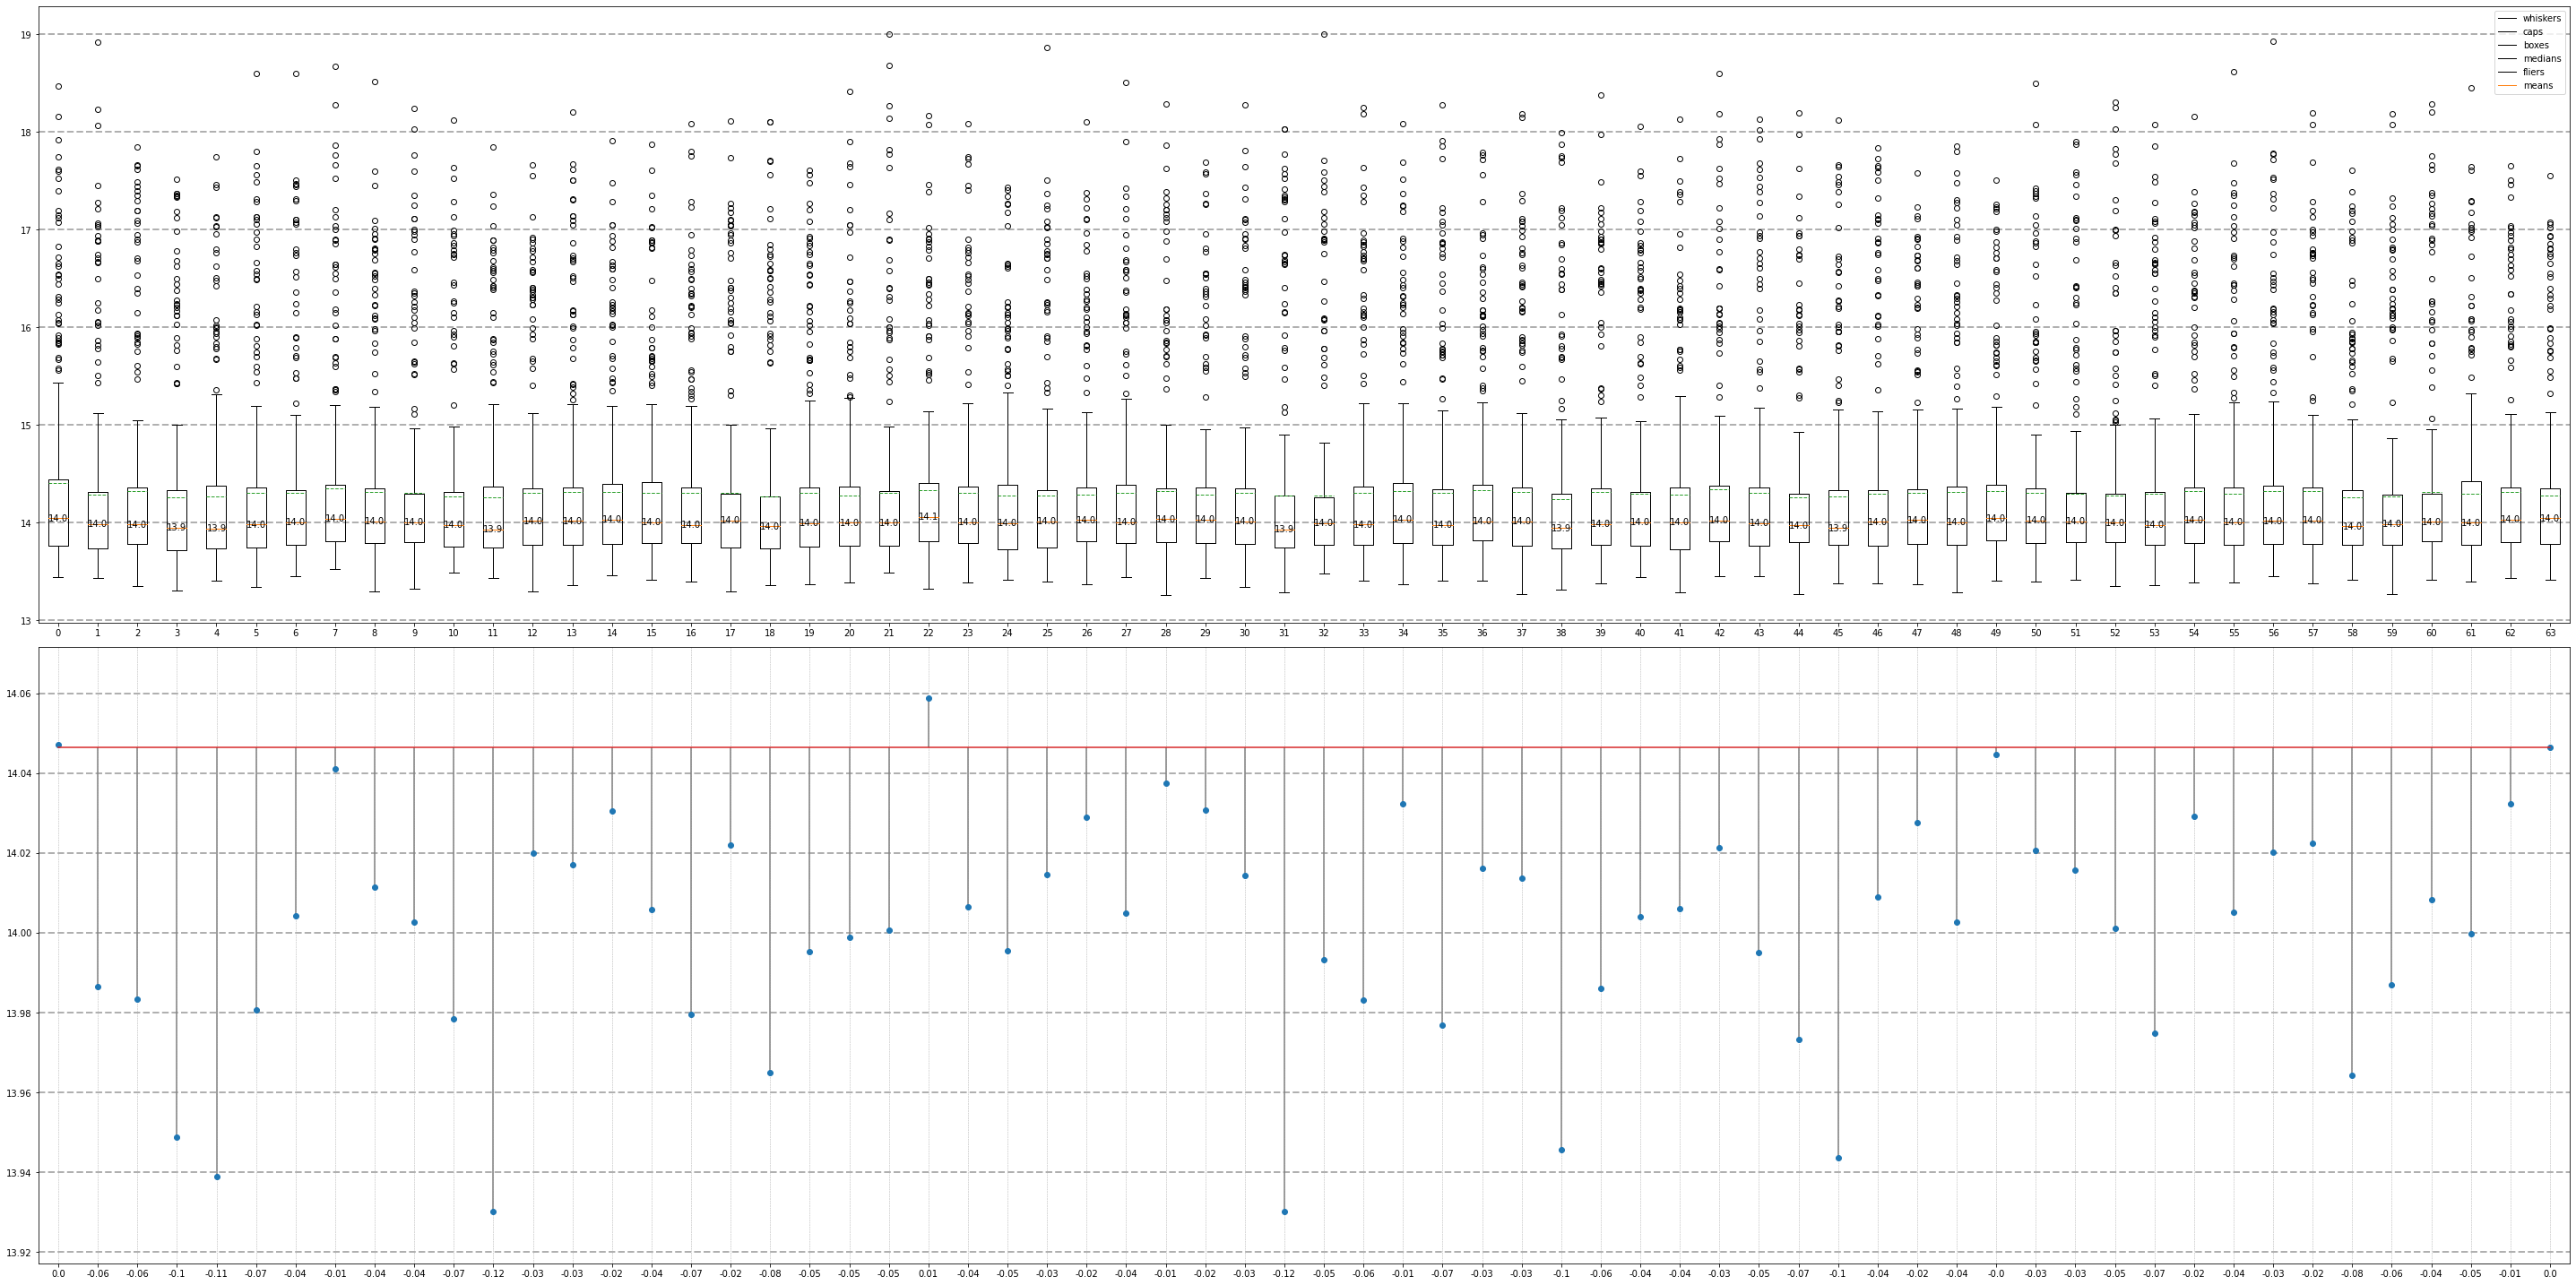

Baseline 1 = 14.0465595
Baseline 2 = 11.902411
Baseline difference = -2.1441485


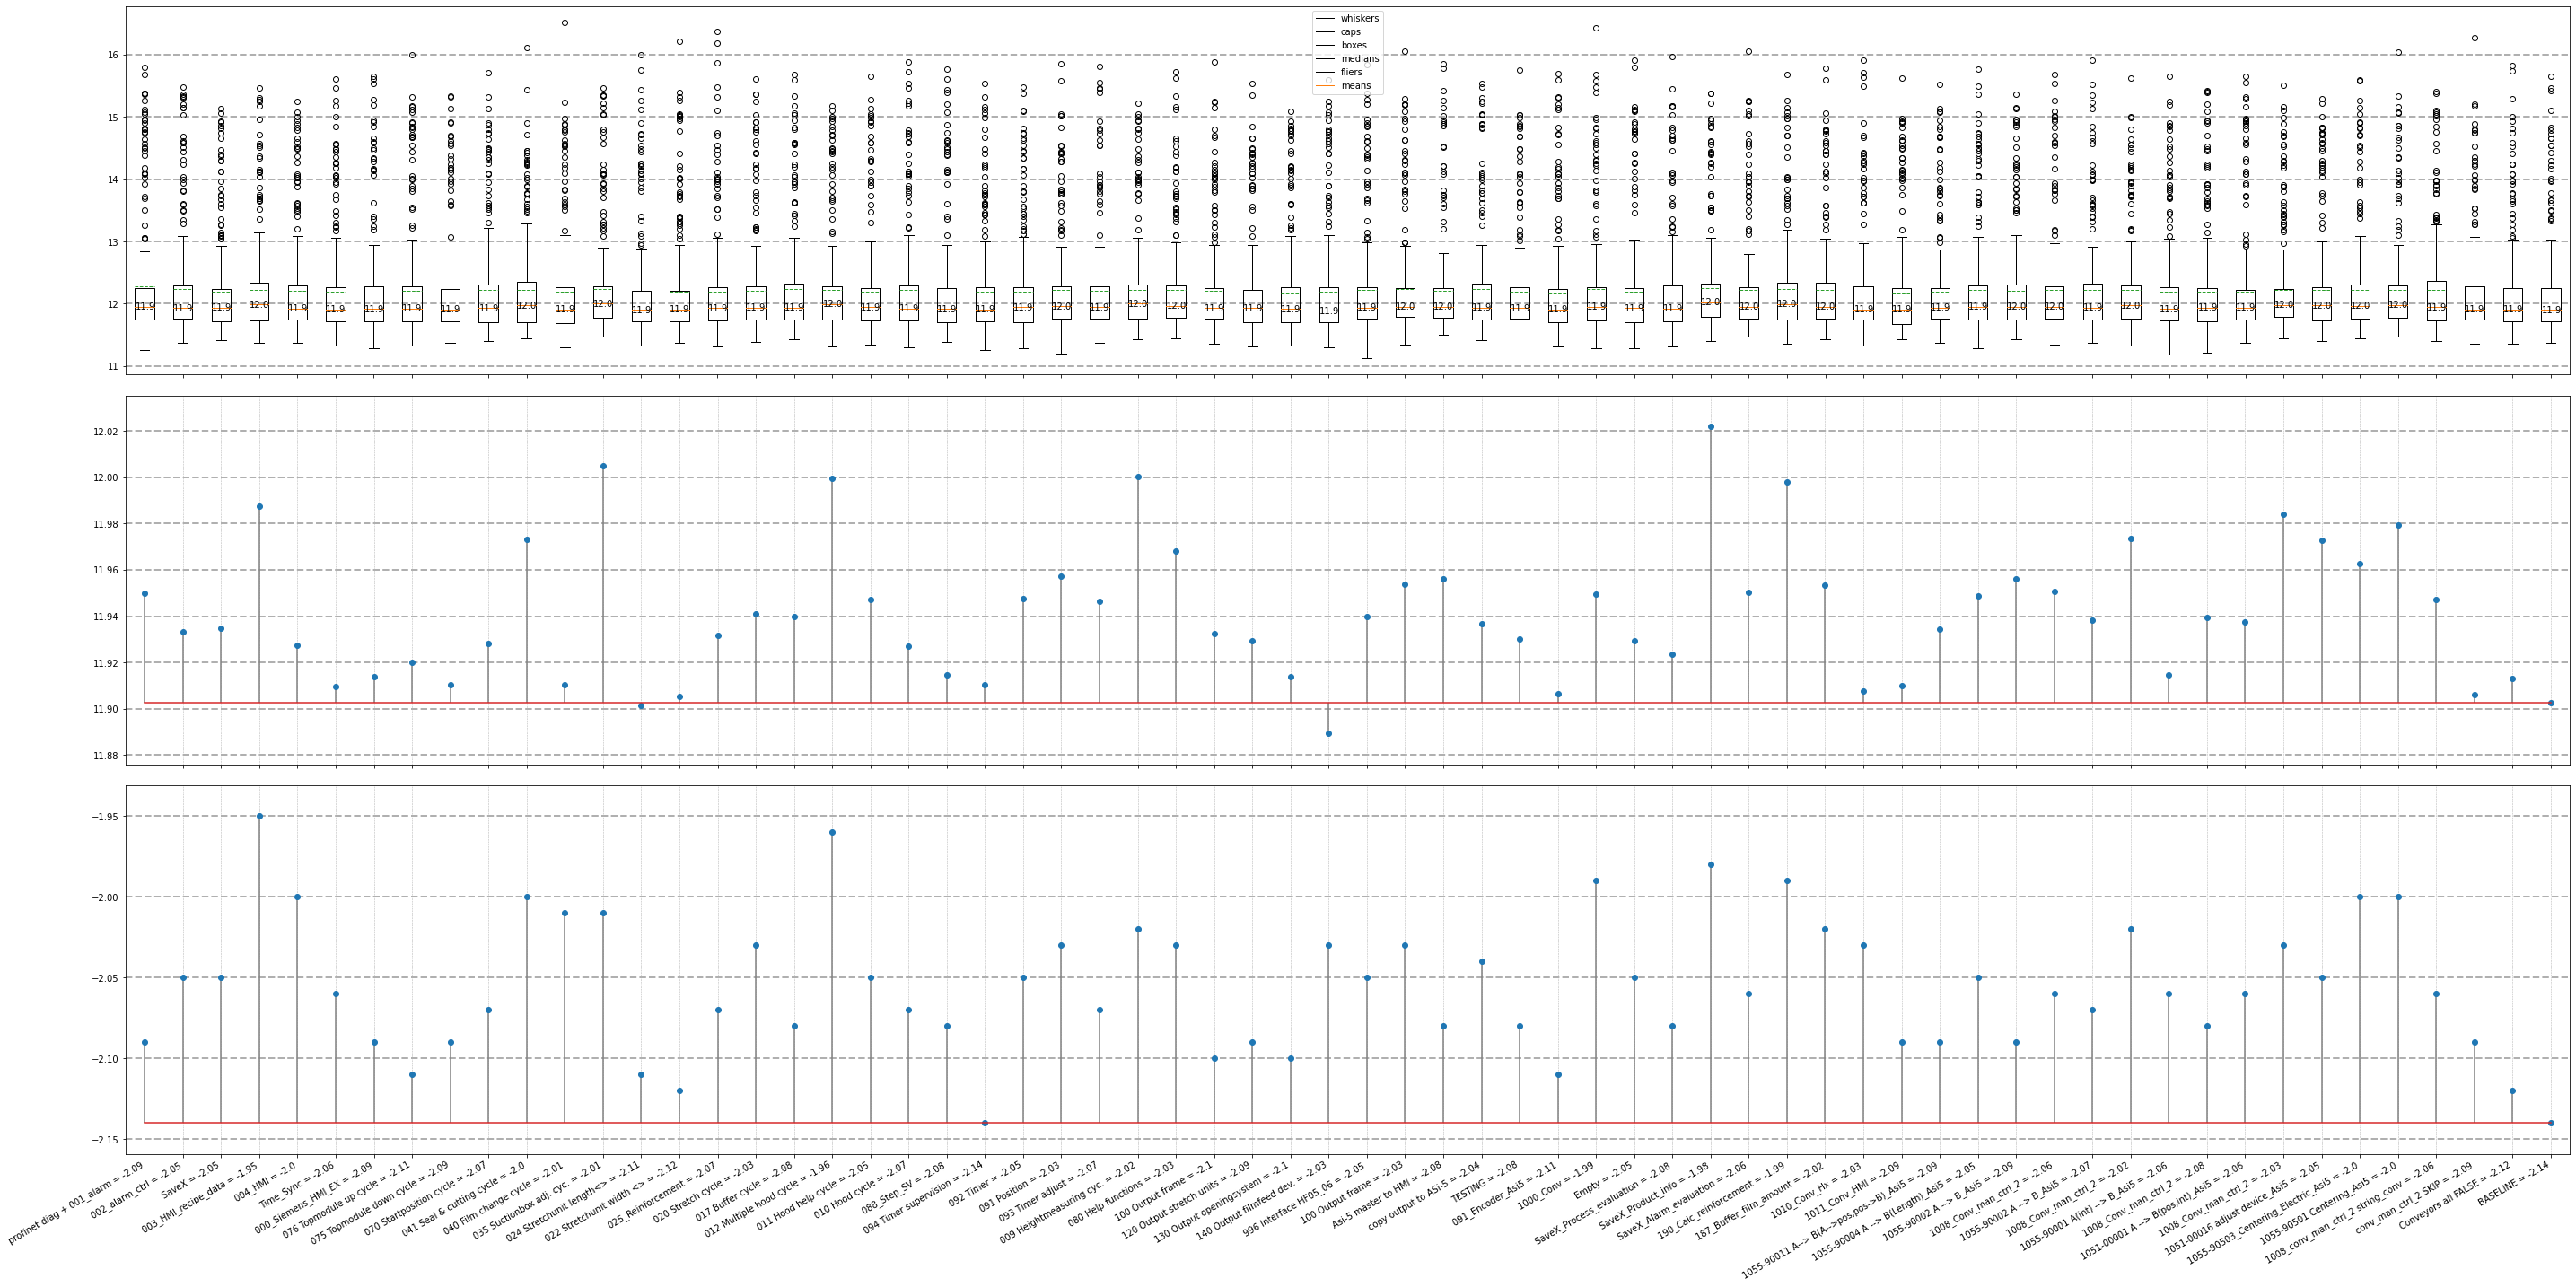

InsideFuncLoop profinet diag + 001_alarm diff: -2.09
InsideFuncLoop 002_alarm_ctrl diff: -2.05
InsideFuncLoop SaveX diff: -2.05
InsideFuncLoop 003_HMI_recipe_data diff: -1.95
InsideFuncLoop 004_HMI diff: -2.0
InsideFuncLoop Time_Sync diff: -2.06
InsideFuncLoop 000_Siemens_HMI_EX diff: -2.09
InsideFuncLoop 076 Topmodule up cycle diff: -2.11
InsideFuncLoop 075 Topmodule down cycle diff: -2.09
InsideFuncLoop 070 Startposition cycle diff: -2.07
InsideFuncLoop 041 Seal & cutting cycle diff: -2.0
InsideFuncLoop 040 Film change cycle diff: -2.01
InsideFuncLoop 035 Suctionbox adj. cyc. diff: -2.01
InsideFuncLoop 024 Stretchunit length<> diff: -2.11
InsideFuncLoop 022 Stretchunit width <> diff: -2.12
InsideFuncLoop 025_Reinforcement diff: -2.07
InsideFuncLoop 020 Stretch cycle diff: -2.03
InsideFuncLoop 017 Buffer cycle diff: -2.08
InsideFuncLoop 012 Multiple hood cycle diff: -1.96
InsideFuncLoop 011 Hood help cycle diff: -2.05
InsideFuncLoop 010 Hood cycle diff: -2.07
InsideFuncLoop 088_Step_S

In [6]:
'''normal'''

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.ticker import (MultipleLocator)
import csv
import pathlib


class Plot():

    def __init__(self, data):
        None

    def csvParser(self, DataFiles):
        for file in DataFiles:
            with open(file) as plotValues:
                FuncLabel = []
                CsvParsed = csv.reader(plotValues, delimiter='\t', quotechar='|')
                FuncData = {}
                for row in CsvParsed:
                    try:
                        if row[0][:8] == 'function':
                            label = row[0][9:]
                            label = label[:-1]
                            InsideFuncLoop = True
                        if row[0] == '':
                            InsideFuncLoop = False
                        if InsideFuncLoop == True:
                            if row[1] != '':
                                FuncLabel.append(float(row[1]))
                            if row[0] == "time[255]":
                                FuncData[label] = FuncLabel
                                FuncLabel = []
                    except IndexError:
                        None
                data.append(FuncData)

class SubPlot(Plot):
    def __init__(self):
        None


file = "test.csv"
data = []
InsideFuncLoop = False
with open(file) as plotValues:
    FuncLabel = []
    spamreader = csv.reader(plotValues, delimiter='\t', quotechar='|')
    FuncData = {}

    for row in spamreader:
        try:
            if row[0][:8] == 'function':
                label = row[0][9:]
                label = label[:-1]
                InsideFuncLoop = True
            if row[0] == '':
                InsideFuncLoop = False
            if InsideFuncLoop == True:
                if row[1] != '':
                    FuncLabel.append(float(row[1]))
                if row[0] == "time[255]":
                    FuncData[label] = FuncLabel
                    FuncLabel = []
        except IndexError:
            None
    data.append(FuncData)


# Plot tables
fig1, ax1 = plt.subplots(sharey=True, sharex=True, figsize=(40, 20))
ax1.axis('tight')
plt.subplot(2, 1, 1)
labels, data = [*zip(*data[0].items())]
bp = plt.boxplot(data, meanline=True, showmeans=True, bootstrap=5000)

line_y = []
for line in bp['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1]  # top of median line
    # overlay median value
    plt.text(x-0.5, y, '%.1f' % y, verticalalignment='center')
    line_y.append(y)

res = {key: [v.get_data() for v in value] for key, value in bp.items()}
plt.xticks(range(1, len(labels) + 1), labels)
plt.grid(True, which='both', axis='y', linewidth=2, linestyle='--')
plt.legend(res)

plt.subplot(2, 1, 2)
ax1.set_xlim(0)
markerline, stemlines, baseline = plt.stem(
    line_y, bottom=line_y[63], linefmt='grey')
baseline_1 = line_y[63]

difference = []
for val in line_y:
    diff = val - line_y[63]
    diff = '%.2f' % diff
    difference.append(float(diff))
plt.xticks(range(0, len(labels)), difference)
plt.grid(True, which='both', axis='x', linewidth=0.5, linestyle='--')
plt.grid(True, which='both', axis='y', linewidth=2, linestyle='--')

plt.tight_layout(pad=1, w_pad=1.0, h_pad=1)
plt.margins(x=0.008, y=0.1)
plt.show()


file = "tonny_test.csv"
data = []
InsideFuncLoop = False
func_description = ['profinet diag + 001_alarm',    #0
                    '002_alarm_ctrl',               #1
                    'SaveX',                        #2
                    "003_HMI_recipe_data",
                    "004_HMI",                      #4
                    "Time_Sync",
                    "000_Siemens_HMI_EX",
                    "076 Topmodule up cycle",
                    "075 Topmodule down cycle",
                    "070 Startposition cycle",      #9
                    "041 Seal & cutting cycle",
                    "040 Film change cycle",
                    "035 Suctionbox adj. cyc.",
                    "024 Stretchunit length<>",
                    "022 Stretchunit width <>",     #14
                    "025_Reinforcement",
                    "020 Stretch cycle",
                    "017 Buffer cycle",
                    "012 Multiple hood cycle",
                    "011 Hood help cycle",          #19
                    "010 Hood cycle", 
                    "088_Step_SV",
                    "094 Timer supervision",
                    "092 Timer", 
                    "091 Position",                 #24
                    "093 Timer adjust",
                    "009 Heightmeasuring cyc.",
                    "080 Help functions",
                    "100 Output frame",
                    "120 Output stretch units",    #29
                    "130 Output openingsystem",
                    "140 Output filmfeed dev.",
                    "996 Interface HF05_06",
                    "100 Output frame",
                    "Asi-5 master to HMI",           #34
                    "copy output to ASi-5",
                    'TESTING',
                    "091_Encoder_Asi5",
                    "1000_Conv",
                    'Empty',                        #39
                    "SaveX_Process_evaluation", 
                    "SaveX_Product_info",
                    "SaveX_Alarm_evaluation",
                    "190_Calc_reinforcement",
                    "187_Buffer_film_amount",       #44
                    "1010_Conv_Hx",                 
                    "1011_Conv_HMI",
                    "1055-90011 A--> B(A-->pos,pos->B)_Asi5",
                    "1055-90004 A --> B(Length)_Asi5",
                    "1055-90002 A --> B_Asi5",
                    "1008_Conv_man_ctrl_2",                 #50
                    "1055-90002 A --> B_Asi5",              #51
                    "1008_Conv_man_ctrl_2",                 #52
                    "1055-90001 A(int) --> B_Asi5",         #53
                    "1008_Conv_man_ctrl_2",                 #54
                    "1051-00001 A --> B(pos,int)_Asi5",     #55
                    "1008_Conv_man_ctrl_2",                 #56
                    "1051-00016 adjust device_Asi5",        #57
                    "1055-90503_Centering_Electric_Asi5",   #58
                    "1055-90501 Centering_Asi5",            #59
                    '1008_conv_man_ctrl_2 string_conv',     #60
                    'conv_man_ctrl_2 SKIP',                 #61
                    'Conveyors all FALSE',        #62
                    'BASELINE']                             #63
if len(func_description) != 64:
    raise "wrong func_description lenght"
with open(file) as plotValues:
    FuncLabel = []
    spamreader = csv.reader(plotValues, delimiter='\t', quotechar='|')
    FuncData = {}

    for row in spamreader:
        try:
            if row[0][:8] == 'function':
                label = row[0][9:]
                label = label[:-1]
                InsideFuncLoop = True
            if row[0] == '':
                InsideFuncLoop = False
            if InsideFuncLoop == True:
                if row[1] != '':
                    FuncLabel.append(float(row[1]))
                if row[0] == "time[255]":
                    FuncData[label] = FuncLabel
                    FuncLabel = []
        except IndexError:
            None
    data.append(FuncData)
# Plot tables
fig1, ax1 = plt.subplots(sharey=True, sharex=True, figsize=(40, 20))
ax1.axis('tight')
plt.subplot(3, 1, 1)
labels, data = [*zip(*data[0].items())]
bp = plt.boxplot(data, meanline=True, showmeans=True, bootstrap=5000)

line_y = []
for line in bp['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1]  # top of median line
    # overlay median value
    plt.text(x-0.5, y, '%.1f' % y, verticalalignment='center')
    line_y.append(y)


res = {key: [v.get_data() for v in value] for key, value in bp.items()}
plt.xticks(range(1, len(labels) + 1), labels)
plt.grid(True, which='both', axis='y', linewidth=2, linestyle='--')
plt.legend(res)

plt.subplot(3, 1, 2)
ax1.set_xlim(0)
markerline, stemlines, baseline = plt.stem(
    line_y, bottom=line_y[63], linefmt='grey')
baseline_2 = line_y[63]
print(f'Baseline 1 = {baseline_1}')
print(f'Baseline 2 = {baseline_2}')
print(f'Baseline difference = {baseline_2 - baseline_1}')
difference_b = []
for val in line_y:
    diff = val - line_y[63]
    diff = '%.2f' % diff
    difference_b.append(float(diff))
plt.xticks(range(0, len(labels)), difference_b)
plt.grid(True, which='both', axis='x', linewidth=0.5, linestyle='--')
plt.grid(True, which='both', axis='y', linewidth=2, linestyle='--')
plt.margins(x=0.008, y=0.1)


plt.subplot(3, 1, 3)
difference_sum = []
for val in range(len(difference)):
    float_val = ((difference_b[val] + baseline_2) - ((difference[val] + baseline_1)))
    float_val = '%.2f' % float_val
    difference_sum.append(float(float_val))

labels_with_comment = []
for i in range(len(difference_sum)):
    labels_with_comment.append(
        func_description[i] + ' = ' + str(difference_sum[i]))
labels_with_comment = tuple(labels_with_comment)

plt.stem(difference_sum, bottom=difference_sum[63], linefmt='grey')
plt.xticks(range(0, len(labels)), labels_with_comment, rotation=45)
fig1.autofmt_xdate()
plt.grid(True, which='both', axis='x', linewidth=0.5, linestyle='--')
plt.grid(True, which='both', axis='y', linewidth=2, linestyle='--')

plt.margins(x=0.008, y=0.1)
plt.tight_layout(pad=1, w_pad=1.0, h_pad=2)
plt.show()
for row in range(len(difference)):
    print(f'InsideFuncLoop {func_description[row]} diff: {difference_sum[row]}')


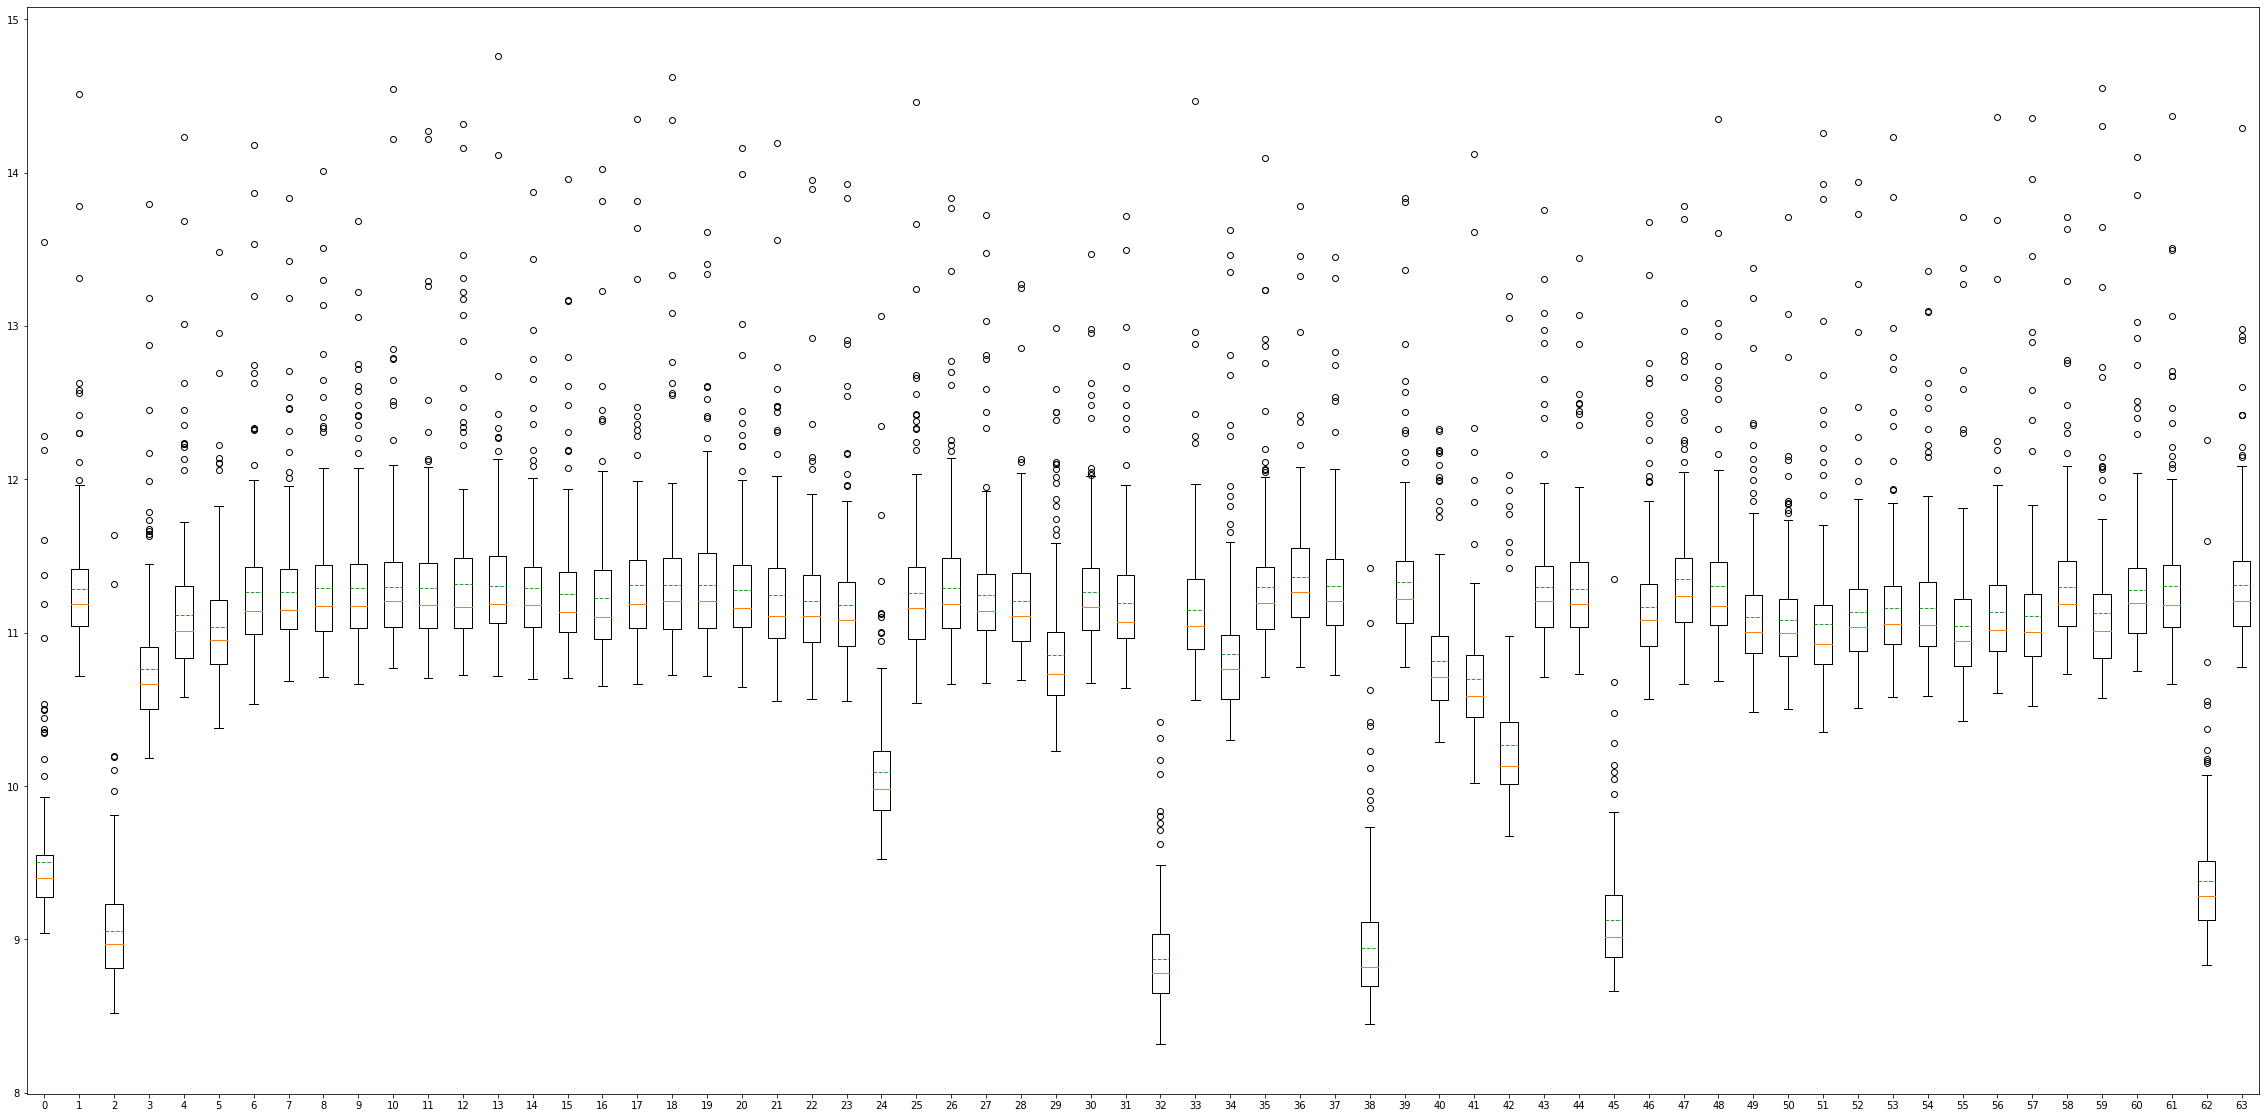

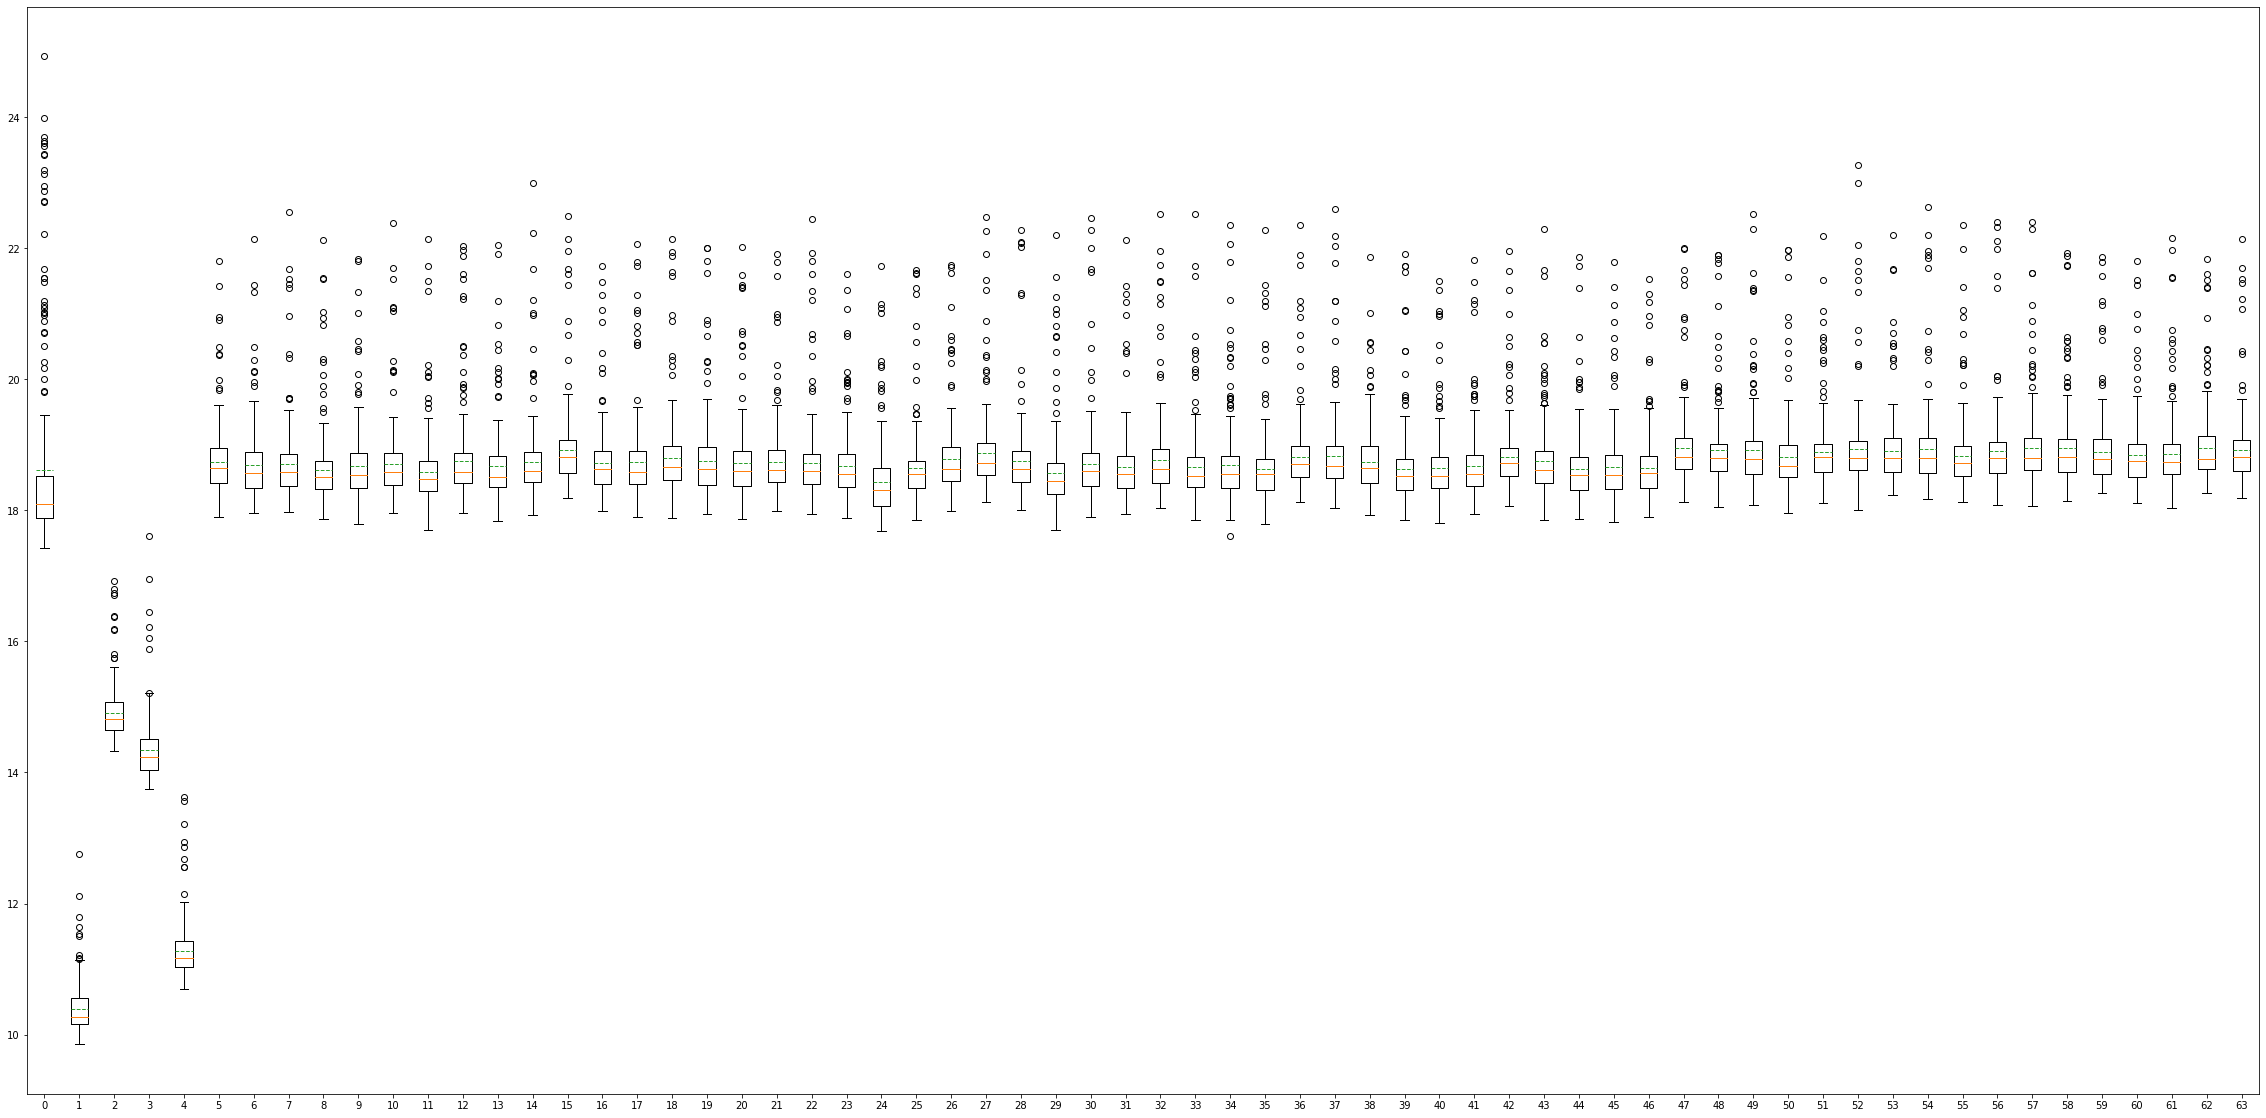

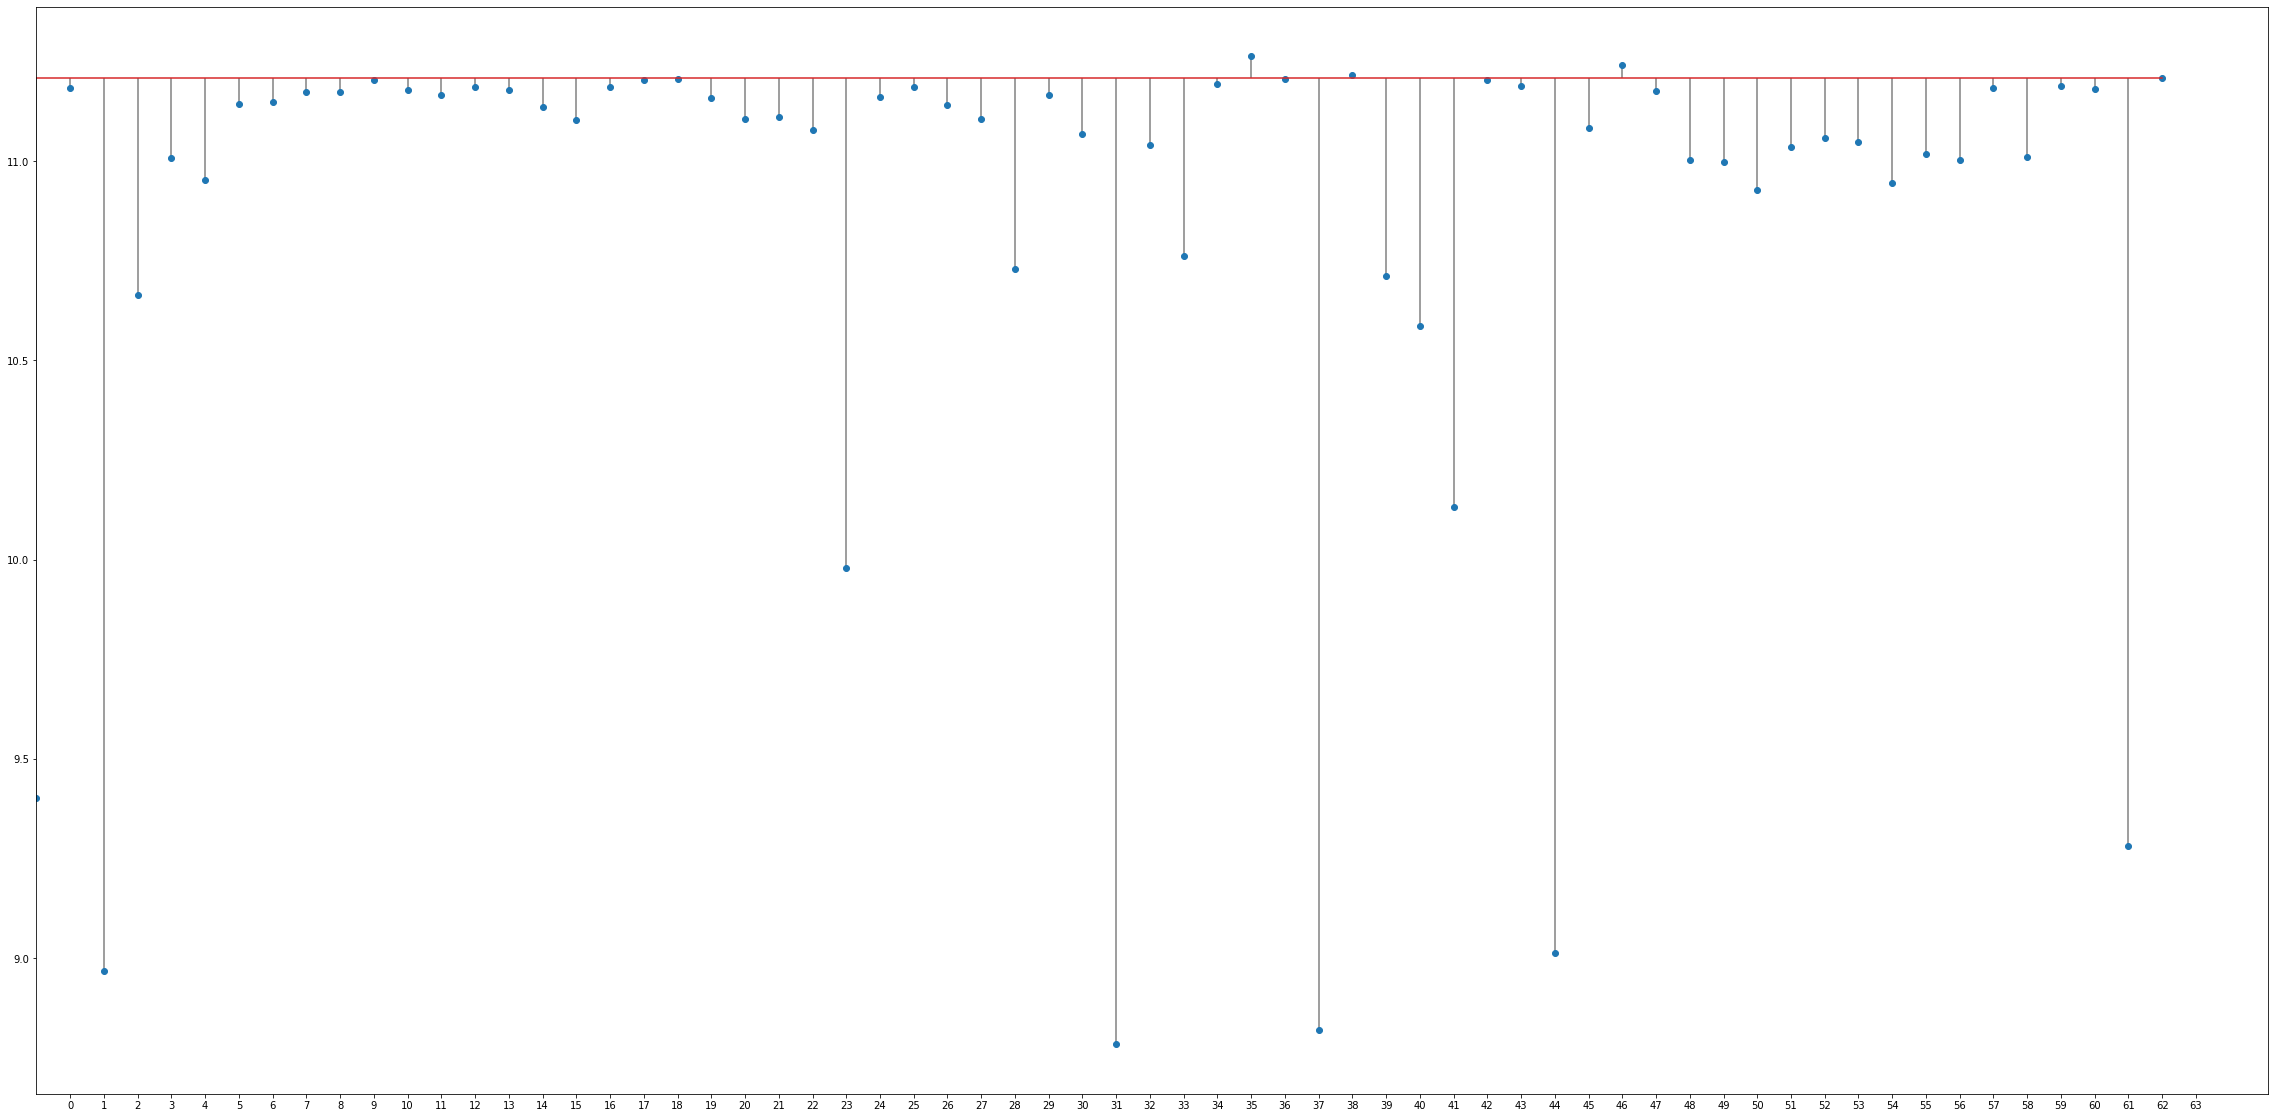

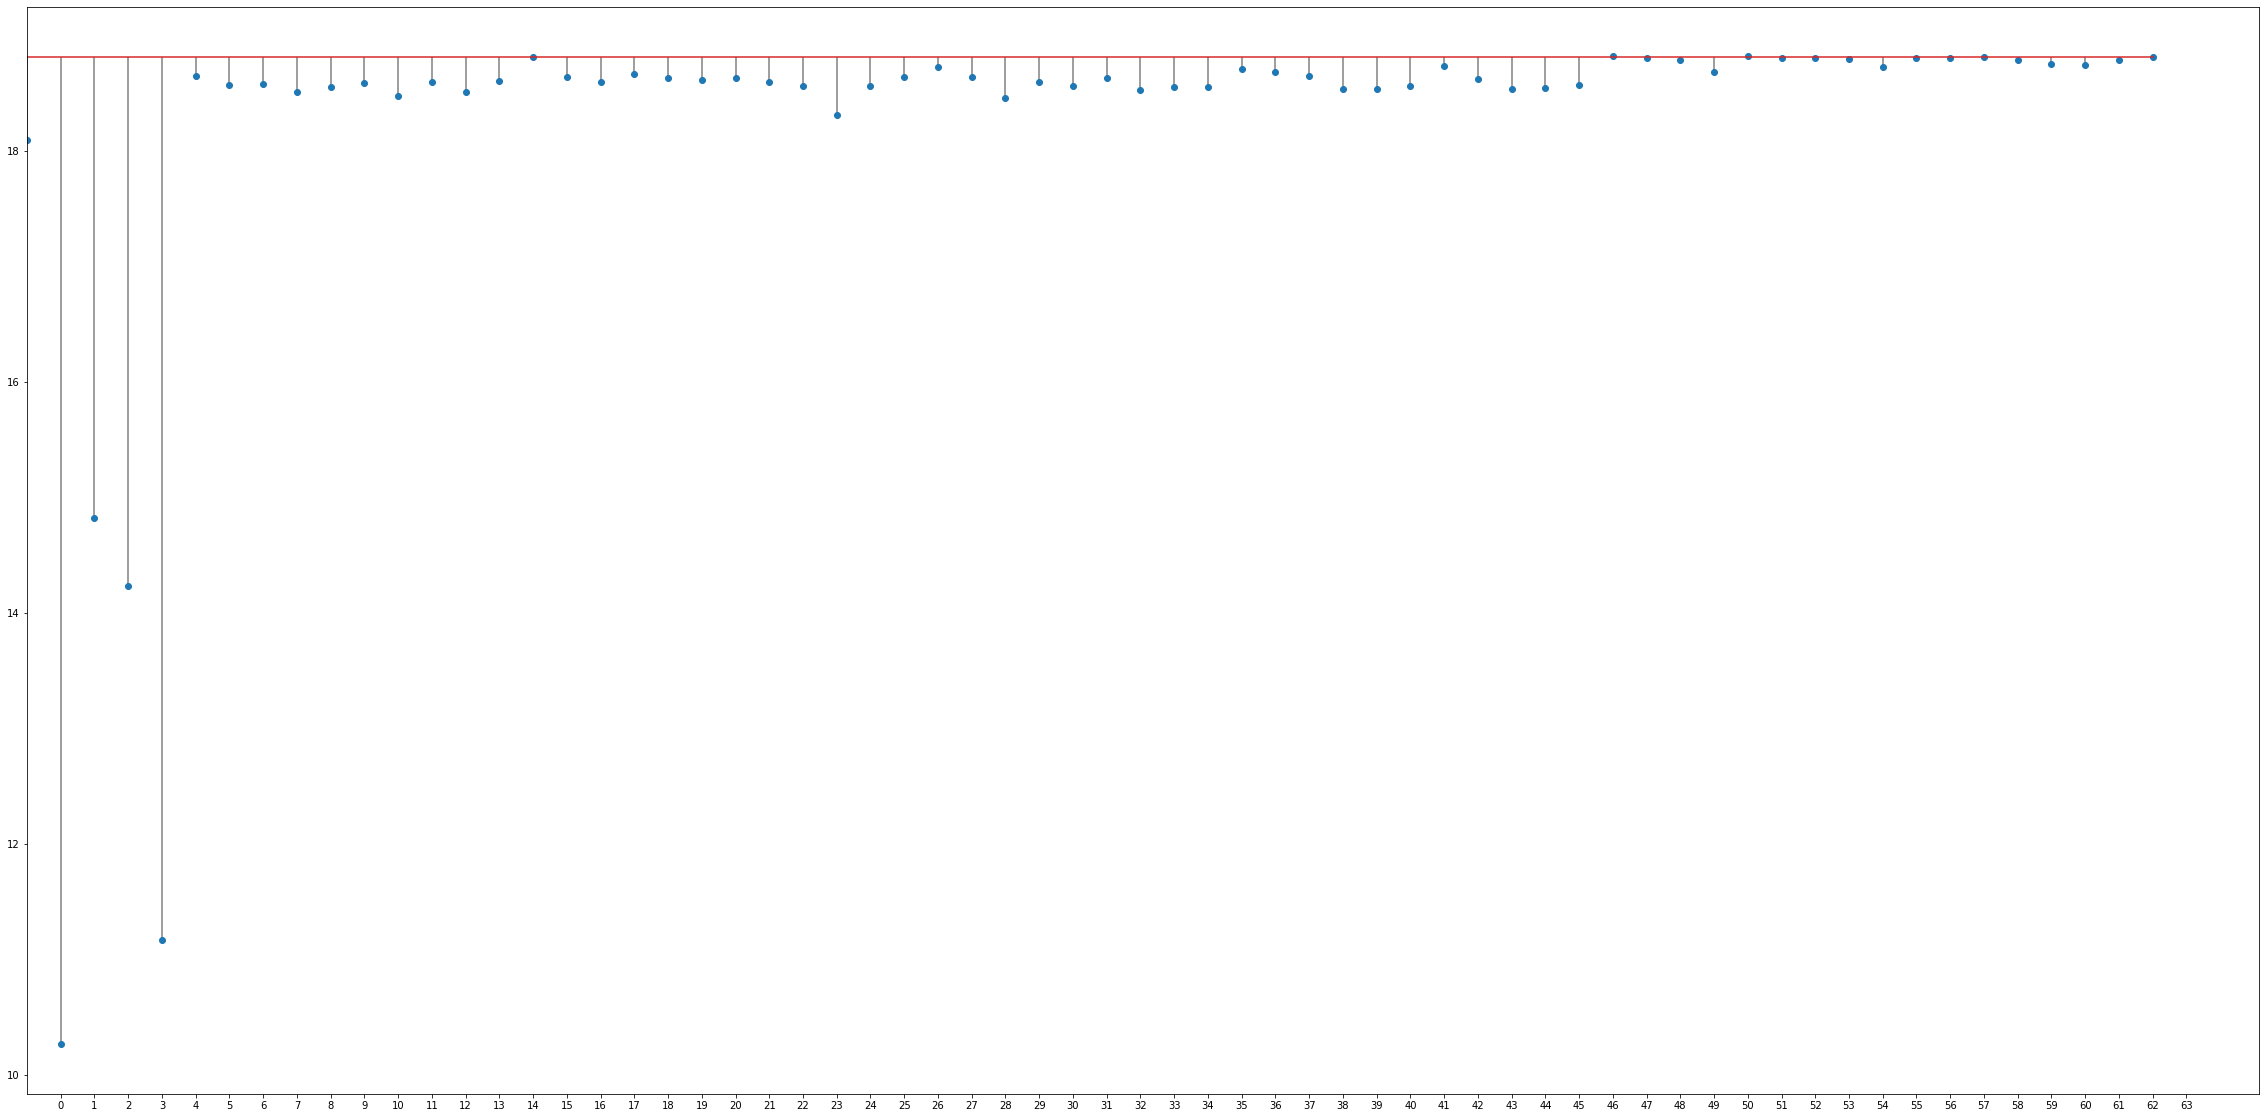

In [44]:
'''class creation'''

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.ticker import (MultipleLocator)
import csv
import pathlib


class BoxPlot():
    def __init__(self, data):
        self.data = data
        self.plotKwargs = {}
        self.plotKwargs['meanline'] = True
        self.plotKwargs['showmeans'] = True
        self.plotKwargs['bootstrap'] = 5000

        self.subPlotKwargs = {}
        self.subPlotKwargs['sharey'] = True
        self.subPlotKwargs['sharex'] = True
        self.subPlotKwargs['figsize'] = (40, 20)

        # Optional definitions
        self.medians: list = []
        self.labels: list = []


    def plot(self) -> None:
        for data in self.data:
            median:list = []
            fig1, ax1 = plt.subplots(**self.subPlotKwargs)
            self.labels, dataPoints = zip(*data.items())
            self.boxplot = plt.boxplot(dataPoints, **self.plotKwargs)
            
            plt.xticks(range(1, len(self.labels) + 1), labels)
            plt.show()

            for line in self.boxplot['medians']:
                # get position data for median line
                x, y = line.get_xydata()[1]
                # overlay median value
                median.append(float(y))
            self.medians.append(median)


class StemPlot():
    def __init__(self, data:list):
        # init data and plot design
        self.data = data
        self.plotKwargs = {}
        self.plotKwargs['linefmt'] = 'grey' # vertical linestyle and color
        self.plotKwargs['bottom'] = '0' # baseline

        # define plot arguments
        self.subPlotKwargs = {}
        self.subPlotKwargs['sharey'] = True
        self.subPlotKwargs['sharex'] = True
        self.subPlotKwargs['figsize'] = (40, 20)

    def plot(self, labels) -> None:
        for points in self.data:
            fig1, ax1 = plt.subplots(**self.subPlotKwargs)
            self.plotKwargs['bottom'] = points[-1]  # set baseline as last datapoint
            markerline, stemlines, baseline = plt.stem(points, **self.plotKwargs)
            ax1.set_xlim(0) # to match-up label 0 with func 0   # TODO alternative fix?
            plt.xticks(range(1, len(labels) + 1), labels)       # TODO labels without boxplot

            plt.show()




class CSVParser():
    def __init__(self, fileList):
        self.fileList : list = fileList
        self.data : list = []

        self.parserKwargs = {}
        self.parserKwargs['delimiter'] = '\t'
        self.parserKwargs['quotechar'] = '|'

        self.parse()

    def parse(self) -> None:
        for file in self.fileList:
            with open(file) as text:
                parsedText = csv.reader(text, **self.parserKwargs)
                datapoints = {}
                functionLabel = False
                func_list = []

                for row in parsedText:
                    try:
                        if row[0][:8] == 'function': # Function data points beginning
                            label = row[0][9:]
                            label = label[:-1] # function[99] --> 99
                            functionLabel = True
                        if row[0] == '': # Empty space between functions
                            functionLabel = False
                        if functionLabel:
                            if row[1] != '': # then it is a data value
                                dataPoint = float(row[1])
                                func_list.append(dataPoint)
                            if row[0] == "time[255]":
                                datapoints[label] = func_list
                                func_list = []
                    except IndexError:
                        None
                self.data.append(datapoints)


if __name__ == '__main__':
    fileList: list = ['third_calls.csv','test.csv']
    parser = CSVParser(fileList)
    plot = BoxPlot(parser.data)
    plot.plot()
    labels = plot.labels

    medians = plot.medians
    plot = StemPlot(medians)
    plot.plot(labels)


Connected: True


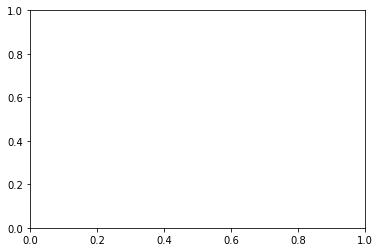

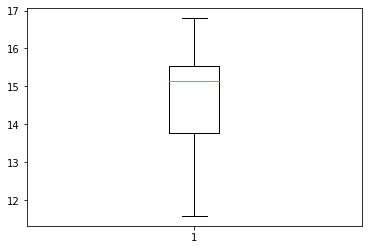

created canvas
created canvas
created canvas


KeyboardInterrupt: 

In [231]:
'''liveplotting of current scantime'''

import snap7
import struct
import matplotlib
from matplotlib import pyplot as plt

class BoxPlot():
    def __init__(self, data):
        self.data = data
        self.plotKwargs = {}
        self.plotKwargs['meanline'] = True
        self.plotKwargs['showmeans'] = True
        self.plotKwargs['bootstrap'] = 5000

        self.subPlotKwargs = {}
        self.subPlotKwargs['sharey'] = True
        self.subPlotKwargs['sharex'] = True
        self.subPlotKwargs['figsize'] = (5, 5)

        # Optional definitions
        self.medians: list = []
        self.labels: list = []
        self.ax1 = matplotlib.axis
        self.fig1 = matplotlib.figure

    def plot(self) -> None:
        for data in self.data:
            median:list = []
            self.fig1, self.ax1 = plt.subplots(**self.subPlotKwargs)
            self.labels, dataPoints = zip(*data.items())
            self.boxplot = plt.boxplot(dataPoints, **self.plotKwargs)

            for line in self.boxplot['medians']:
                # get position data for median line
                x, y = line.get_xydata()[1]
                # overlay median value
                median.append(float(y))
            self.medians.append(median)


client = snap7.client.Client()
client.set_connection_params(address='192.168.73.2',local_tsap=0,remote_tsap=1)
client.connect(address='192.168.73.2',rack=0,slot=1)
connectionStatus = client.get_connected()
print(f'Connected: {connectionStatus}')

emptyData = []
fig = plt.figure()
ax = fig.add_subplot(111)
fig.canvas.draw()


fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

#fig.show()
fig.canvas.draw()

for i in range(0,100):
    db = []
    dbValues = {}
    for i in range(256):
        it = i * 4
        response = client.db_read(3, start=it, size=4)
        dbValues[i] = (float(struct.unpack('>f', response[0:4])[0]))
    db.append(dbValues)
    labels, dataPoints = zip(*db[0].items())

    ax.clear()
    ax.boxplot(dataPoints)
    fig.canvas.draw()
    plt.pause(1)
    print('created canvas')